In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
from textblob import TextBlob
import seaborn as sns
df = pd.read_csv('tweets.csv',encoding= "ISO-8859–1")
df.head(10)

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,5.703006e+17,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,5.703002e+17,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,5.703000e+17,Virgin America,dhepburn,0,"@virginamerica Well, I didn'tâ¦but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,5.702955e+17,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [2]:
df.columns

Index(['tweet_id', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [3]:
df.isnull().sum()

tweet_id              0
airline               0
name                  0
retweet_count         0
text                  0
tweet_coord       13621
tweet_created         0
tweet_location     4733
user_timezone      4820
dtype: int64

In [4]:
df.tweet_location.value_counts()

Boston, MA        157
New York, NY      156
Washington, DC    150
New York          137
USA               128
                 ... 
Across America      1
ON.                 1
Lubbock Texas       1
Radford HS          1
Beaufort, SC        1
Name: tweet_location, Length: 3022, dtype: int64

In [5]:
df.user_timezone.value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Prague                           1
Bucharest                        1
Tokyo                            1
Canberra                         1
Midway Island                    1
Name: user_timezone, Length: 85, dtype: int64

In [6]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

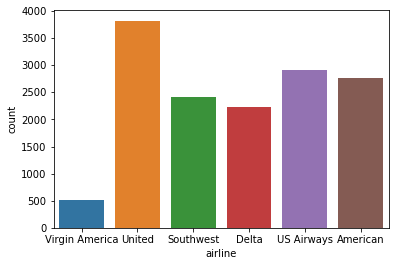

In [7]:
sns.countplot(df.airline)

In [8]:
df.text[279]
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

@VirginAmerica what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.


In [8]:
re.sub(r'@[A-Za-z0-9]+','',df.text[279])

' what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.'

In [9]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

nums = [0,14640]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    #print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ) )  
   
        clean_tweet_texts.append(tweet_cleaner(df['text'][i]))
    

#For the rest, you get the idea, I divided the whole dataset into four batches.Saving cleaned data as csv
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['airline'] = df.airline
clean_df.head()

clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
new_df = pd.read_csv(csv,index_col=0)
new_df.to_csv('Final.csv', mode='w', index=False, encoding="utf-8")
final_df = pd.read_csv('Final.csv')
print('The Parsing is complete')

Cleaning and parsing the tweets...

The Parsing is complete


In [10]:
#Test whether the text has been parsed or not 
final_df.head()

,text,airline
0,what said,Virgin America
1,plus you ve added commercials to the experienc...,Virgin America
2,i didn t today must mean i need to take anothe...,Virgin America
3,it s really aggressive to blast obnoxious ente...,Virgin America
4,and it s a really big bad thing about it,Virgin America


In [11]:
final_df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [12]:
COLS = ['airline','sentiment','subjectivity','polarity']

In [13]:
clean_tweets = []
for tweet in final_df.text:
    clean_tweets.append(tweet_cleaner(tweet))
final_df['clean_text'] = pd.DataFrame(clean_tweets)

In [14]:
polarity = []
for tweet in clean_tweets:
    #print (tweet)
    analysis = TextBlob(tweet)
    print (tweet ,analysis.sentiment)
    polarity.append(analysis.sentiment.polarity)
final_df['polarity'] = pd.DataFrame(polarity)

what said Sentiment(polarity=0.0, subjectivity=0.0)
plus you ve added commercials to the experience tacky Sentiment(polarity=0.0, subjectivity=0.0)
i didn t today must mean i need to take another trip Sentiment(polarity=-0.3125, subjectivity=0.6875)
it s really aggressive to blast obnoxious entertainment in your guests faces they have little recourse Sentiment(polarity=0.0062500000000000056, subjectivity=0.35)
and it s a really big bad thing about it Sentiment(polarity=-0.3499999999999999, subjectivity=0.3833333333333333)
seriously would pay a flight for seats that didn t have this playing it s really the only bad thing about flying va Sentiment(polarity=-0.2083333333333333, subjectivity=0.6333333333333333)
yes nearly every time i fly vx this ear worm won t go away Sentiment(polarity=0.45, subjectivity=0.65)
really missed a prime opportunity for men without hats parody there Sentiment(polarity=0.2, subjectivity=0.2)
well i didn t but now i do d Sentiment(polarity=0.0, subjectivity=0.0)

maybe one day you ll be the one quoted on Sentiment(polarity=0.0, subjectivity=0.0)
flight delayed no one remembered to turn the heat on flight leaving ord seriously Sentiment(polarity=-0.3333333333333333, subjectivity=0.6666666666666666)
another awesome new plane flight and extremely nice captain steve connolly Sentiment(polarity=0.5787878787878787, subjectivity=0.8181818181818182)
to speak to a real person to get this resolved politely and efficiently Sentiment(polarity=0.2, subjectivity=0.30000000000000004)
i hadn t filed a refund claim as i was told there was no charge by your dm this is disputed by my bank hence why i would like Sentiment(polarity=0.0, subjectivity=0.0)
did bags make it on the flight out of iad second day without clothes is pretty inconvenient we re pretty curious unitedairlines Sentiment(polarity=-0.039999999999999994, subjectivity=0.8)
every united flight between saipan and guam is an adventure you never know when s old plane will be operational Sentiment(polari

i need help but in spanish Sentiment(polarity=0.0, subjectivity=0.0)
a very disappointing experience plane mech delay and next one didn t wait no sincere apology just told me to complain online Sentiment(polarity=-0.3433333333333333, subjectivity=0.47)
i lost my sunglasses on the flight from okc to iah this morning am takeoff is there any way to retrieve them Sentiment(polarity=0.0, subjectivity=0.0)
with the exception of everything you ve asked for heh Sentiment(polarity=0.0, subjectivity=0.0)
ua denver to austin still on the ground Sentiment(polarity=0.0, subjectivity=0.0)
either your staff or whoever you contract with at pvd is failing you big time tonight Sentiment(polarity=0.0, subjectivity=0.1)
ua just landed Sentiment(polarity=0.0, subjectivity=0.0)
considering it currently gold on why should i make the jump for an upcoming flight from sfo to singapore Sentiment(polarity=0.0, subjectivity=0.4)
flight Sentiment(polarity=0.0, subjectivity=0.0)
worst flights i ve ever had ground cr

they let us board again but will we fly this time who knows shouldhaveflowndelta Sentiment(polarity=0.8, subjectivity=0.9)
apparently sleeping in b terminal wasn t the worst situation someone told other ua passengers they had to sleep at baggage claim Sentiment(polarity=-0.35833333333333334, subjectivity=0.5750000000000001)
why don t you de ice while the plane sits there with no one in it for hours or we could just delay Sentiment(polarity=0.0, subjectivity=0.0)
fuck you for not caring Sentiment(polarity=-0.4, subjectivity=0.6)
its been five days i m just asking you to clarify your policy on car seats i don t want to have to take this higher up Sentiment(polarity=0.25, subjectivity=0.5)
question are departure times based off eastern central time or the time zone your actually in Sentiment(polarity=0.0, subjectivity=0.175)
very quick ty i am sorry to hear this can you please follow and dm me the details of what transpired jh Sentiment(polarity=-0.033333333333333326, subjectivity=0.825)


of course that was the start of my trip wks ago its gone further downhill on my return Sentiment(polarity=0.0, subjectivity=0.5)
no u don t Sentiment(polarity=0.0, subjectivity=0.0)
how much longer will it take it a guitar not a royal commission Sentiment(polarity=0.2, subjectivity=0.2)
i have a voucher that expires next week can i get an extension on it before it expires Sentiment(polarity=0.0, subjectivity=0.0)
sure but different texts changing time gate especially locations across the entire concourse that just seemed a little off Sentiment(polarity=0.0625, subjectivity=0.7227777777777777)
you know what would be awesome providing us with complimentary entertainment on your flights especially those longer than hours Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
dm sent thanks Sentiment(polarity=0.2, subjectivity=0.2)
to late flight now but in future flights train staff better to handle emergency situations and ground staff in customer service Sentiment(pola

worst service ever denied access to our flight and then moved flight times how hard is it to schedule a gate next time Sentiment(polarity=-0.4305555555555556, subjectivity=0.5138888888888888)
i m in denver my bag is in san jose see something wrong here Sentiment(polarity=-0.5, subjectivity=0.9)
you know it s bad when you re praying your connecting flight is delayed because of an hour delay on the first flight justgetmehome Sentiment(polarity=-0.22499999999999992, subjectivity=0.5)
playing hide and seek with the gate we can t find it it should only be a few more minutes Sentiment(polarity=0.09999999999999999, subjectivity=0.5333333333333333)
so our flight into ord was delayed because of air force one but the last flight to sbn is at mins from now we just landed Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
your flights are really cheap what s the catch Sentiment(polarity=0.4, subjectivity=0.7)
lgjw b i voluntarily rerouted st leg of journey was in economy and was supposed to

hrs searching for flts find on site can t book the offered bc seg isn t really available lies falseadvertising Sentiment(polarity=0.4, subjectivity=0.4)
next flight don t think i ll be spending anymore money with you guys ever it was that bad Sentiment(polarity=-0.3499999999999999, subjectivity=0.3333333333333333)
are my bags here yet they were at palm springs airport i was at lax how come i beat my bags here Sentiment(polarity=0.0, subjectivity=0.0)
why couldn t you have changed the tire of my delayed ua flight when it arrived instead of waiting until boarding Sentiment(polarity=0.0, subjectivity=0.0)
a generic form with tons of fields asking for info you already expected more as a premier platinum another servicefail Sentiment(polarity=0.13333333333333333, subjectivity=0.3)
wtf is your username and or email addr signin still unavailable been trying to login since sunday Sentiment(polarity=-0.5, subjectivity=1.0)
i am flying from msp to dxb my child will turn during the trip do i have

is my favorite airlines i ve never had issues with them plus there crew is entertaining Sentiment(polarity=0.5, subjectivity=0.85)
should be a way to give voice to customers who pay for services that are not satisfactorily delivered justsayin Sentiment(polarity=0.0, subjectivity=0.0)
your flight attendants are really funny the sass is giving me life Sentiment(polarity=0.25, subjectivity=1.0)
i am genuinely surprised you all don t upgrade people when you cancelled flight their flights or at least put them in a comparable spot Sentiment(polarity=-0.09999999999999999, subjectivity=0.65)
following thank you Sentiment(polarity=0.0, subjectivity=0.1)
would someone please dm me the customer relations number the website has only customer service Sentiment(polarity=0.0, subjectivity=1.0)
this is the second time in a row i haven t received text updates about flight time change don t offer if you won t use it Sentiment(polarity=0.0, subjectivity=0.0)
you cancelled flightled my flight and now i am

yep after two hours and thirty minutes Sentiment(polarity=0.0, subjectivity=0.0)
hey why don t you add the intl number to your error when checking in going on hrs looking for a way to checkin cancun Sentiment(polarity=0.0, subjectivity=0.0)
i finally hung up after hours and was not able to get the flight i needed stuckintampa Sentiment(polarity=-0.125, subjectivity=0.8125)
my wife needs help she is stranded in chicago and can t get out until monday they won t find her bag because volume too high Sentiment(polarity=0.16, subjectivity=0.5399999999999999)
i was on hold for two hours and finally hung up i was able to do what i needed to without customer service eventually Sentiment(polarity=0.25, subjectivity=0.8125)
i m here airport i ve waited hours for my bag no one knows shit mgmt knows nothing very mad customer Sentiment(polarity=-0.50625, subjectivity=0.9)
how you gonna cancelled flight my flight but run flights at the exact same time cmon fam Sentiment(polarity=0.125, subjectivity=0

i can go i want to badly i don t know how to dm can i e mail you help wmn life com Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
thank you for your help shannon great customer service Sentiment(polarity=0.8, subjectivity=0.75)
hours late flight but i made it to sf maybe you can help me get on an earlier flight on sunday Sentiment(polarity=-0.15, subjectivity=0.55)
again another ride sw employee that printed out boarding passes deficiency in training obviously Sentiment(polarity=0.0, subjectivity=0.5)
thanks lindsey the southwest twitter team for great service a speedy resolution luvagent swa Sentiment(polarity=0.5, subjectivity=0.475)
apparently mechanics had to be flown in to fix some planes not the most assuring sign Sentiment(polarity=0.275, subjectivity=0.425)
please help we really want to fly with you guessweflyingdelta Sentiment(polarity=0.5, subjectivity=0.55)
how oh how do we get tickets Sentiment(polarity=0.0, subjectivity=0.0)
now accepting apple s 

amazing service by your sw stewardesses from den to cun and from cun to atl and atl to lax thank u Sentiment(polarity=0.6000000000000001, subjectivity=0.9)
ftw hope they ll sing us a song on our flight to phoenix today terminal humphrey Sentiment(polarity=0.0, subjectivity=0.0)
did you pick the winners for the destinationdragons yearslate flightr maybeijustlost whyyounoloveme Sentiment(polarity=0.0, subjectivity=0.0)
dragonss lol i m sorry i m just seeing this now but lauren oh my god ahhhh Sentiment(polarity=0.15000000000000002, subjectivity=0.85)
bad weather and multiple cancelled flighted flights has us all scared noted for next time Sentiment(polarity=-0.23333333333333328, subjectivity=0.2222222222222222)
good to know now three sets of travelers in just mins standing here waiting for mins to pass by Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
once or twice a year hard to get vacation time from work sometimes but love flying with you guys Sentiment(polarity=0.1041666666

at the airport ready to get this red eye going soooooo sleepy noplacelikehome eventhoughits degreesathome Sentiment(polarity=0.1, subjectivity=0.25)
customer service says since my wife setup a family account that she now can t join mine for a year help me fix please Sentiment(polarity=0.0, subjectivity=0.0)
full to capacity i also pid extra for these seats perhaps the crew could be more helpful Sentiment(polarity=0.2833333333333333, subjectivity=0.3833333333333333)
we have twice they said they can t dim those lights but they did on our first flight Sentiment(polarity=0.175, subjectivity=0.41666666666666663)
we hope you re still our bae haa man Sentiment(polarity=0.0, subjectivity=0.0)
its domestic i just wanted more of an idea so i don t get surprised Sentiment(polarity=0.19999999999999998, subjectivity=0.5)
that makes two of us lol blushing Sentiment(polarity=0.8, subjectivity=0.7)
would a storage container like this green one be acceptable to check in with luggage gal totes Sentiment

i have a disabled seat in row do i get to board earlier Sentiment(polarity=-0.1, subjectivity=0.4)
thanks for not guarantee that you can not deli ever my bags to my hotel when bag missed connection sfo customerservicenot Sentiment(polarity=0.2, subjectivity=0.2)
flight Sentiment(polarity=0.0, subjectivity=0.0)
pittsburgh Sentiment(polarity=0.0, subjectivity=0.0)
you re lucky we re still flying you after today s landing gear failure get your act together and help us sit with our kids Sentiment(polarity=0.008333333333333304, subjectivity=0.5666666666666667)
so the prefference option is not something that you honor so why having it as one of the services if not applied Sentiment(polarity=0.0, subjectivity=0.0)
if you want to be helpful find us a seat don t quote terms and conditions jetbluefail Sentiment(polarity=0.0, subjectivity=0.0)
do you really think it s okay to sit kids away from parents srsly esp after your landing gear failure Sentiment(polarity=0.12777777777777774, subjectivity=

i bein calling jetblue no respond i leave my number no call back i think jetblue is loosing a customer Sentiment(polarity=0.0, subjectivity=0.0)
i m on flt lax to fll both ppl are sleeping so id rather not disturb in flight tried to dl movie no go Sentiment(polarity=0.0, subjectivity=0.0)
made it to costa rica and back missing it already pura vida Sentiment(polarity=-0.1, subjectivity=0.025)
me again you don t have abc on inflight tv do you if so what channel sharktank is on Sentiment(polarity=0.0, subjectivity=0.0)
love you guys you know that but i paid for prem wifi toplay no go ping terrible up too Sentiment(polarity=-0.25, subjectivity=0.8)
saved the day lost a costumer jetblue makingthingseasy feelbetter Sentiment(polarity=0.0, subjectivity=0.0)
at lgb in sunny so cal Sentiment(polarity=0.0, subjectivity=0.0)
do you think snow in boston on will effect my flight Sentiment(polarity=0.0, subjectivity=0.0)
post i d like to see markie too Sentiment(polarity=0.0, subjectivity=0.0)
who d

tried considerable confusion no announcement no sign updates Sentiment(polarity=0.1, subjectivity=0.45)
jetbluebos what s up with luggage for flt dca bos pax waiting for min for bags no show carousel signs not updating Sentiment(polarity=0.0, subjectivity=0.0)
thx for the pointer but im good with the big monitor any advice on who i should pick to come our of the western conf nba Sentiment(polarity=0.2333333333333333, subjectivity=0.23333333333333336)
i had fight get a credit for the value of my bag but i got it skytrax jetblue corpgreed nevertakeno Sentiment(polarity=0.0, subjectivity=0.0)
airways corporation jblu loses on news that airways wallstreet scope Sentiment(polarity=-0.3, subjectivity=0.1)
they did not have any asked if i wanted tea how do you have tea not coffee i m a gold on united coffee i nvr think x about Sentiment(polarity=0.0, subjectivity=0.0)
ur wed bwi boston flights pm really need to be better scheduled they are almost always delayed Sentiment(polarity=0.35, subjec

everyone is sorry don t have what i need for meeting tomorrow charac isn t nearly enough to highlight your shortcomings Sentiment(polarity=-0.25, subjectivity=0.75)
is the worst i have to pay just to not take my first flight in a round trip otherwise they ll cancelled flight my whole flight Sentiment(polarity=-0.1875, subjectivity=0.5333333333333333)
if it was so important why did i wait on hold and then get hung up on by your computer disappointed Sentiment(polarity=-0.175, subjectivity=0.875)
thank u i wiil write after call travel agency Sentiment(polarity=0.0, subjectivity=0.0)
terrible service Sentiment(polarity=-1.0, subjectivity=1.0)
disgusted with your poor customer service u wrongfully remove miles from my dividend miles and no live person Sentiment(polarity=-0.4893939393939393, subjectivity=0.7000000000000001)
please hold flight us in phoenix i m a weary traveler stuck on another flight because the tarmac is having issues Sentiment(polarity=0.0, subjectivity=0.0)
no live perso

pissing off thousands of east coast customers when the delay is longer than the flight you fail Sentiment(polarity=-0.5, subjectivity=0.29999999999999993)
please have your people hold flight from phoenix to san jose we pulling up to the gate scheduled to depart at Sentiment(polarity=0.0, subjectivity=0.0)
hours and counting what kind of travel voucher do i get for this Sentiment(polarity=0.6, subjectivity=0.9)
we ve been waiting at the gate for hrs why are we now waiting to stow the luggage Sentiment(polarity=0.0, subjectivity=0.0)
that s h m waiting to get my bag h m of flight delays plus the hrs of delay i had on the way out never flying you again Sentiment(polarity=0.0, subjectivity=0.0)
stuck in florida with no flights service sucks here nofood nodrinks nohelp Sentiment(polarity=-0.3, subjectivity=0.3)
why can t the gate agent on flight provide an update seriously this is ridiculous how long people have been waiting Sentiment(polarity=-0.2388888888888889, subjectivity=0.68888888888

wow you wouldn t say Sentiment(polarity=0.1, subjectivity=1.0)
bf has been stuck in clt all day is the lounge offering free this weather sucks we all want to cry tequila shots Sentiment(polarity=0.05000000000000002, subjectivity=0.55)
we don t like to hear this we re sorry that it s taking so long to get through stop sending generic responses Sentiment(polarity=-0.18333333333333335, subjectivity=0.4666666666666666)
sucks flt late flight by mins missed my connection thanks for the bucks and a middle seat on the next flt Sentiment(polarity=-0.07999999999999999, subjectivity=0.21999999999999997)
worst experience of all time will never ever ever travel with you again ever Sentiment(polarity=-1.0, subjectivity=1.0)
i wasnt flying your airline tonight however a friend was and i was present for her help i flying united and they could learn Sentiment(polarity=0.0, subjectivity=0.0)
how long before departure do gates stay open will i make my connecting flight to rdu from flight Sentiment(polari

i called the btv desk they had more information so it exists your systems don t make it easy for the customer to access it Sentiment(polarity=0.4666666666666667, subjectivity=0.6666666666666667)
awesome and yes is Sentiment(polarity=1.0, subjectivity=1.0)
that website does not give correct info said my bag was in miami was in key west the entire time i got the run around for days Sentiment(polarity=0.0, subjectivity=0.8125)
was on hold for about minutes after speaking lady at the airport counter gave up Sentiment(polarity=0.0, subjectivity=0.0)
i just want to find my bag so i won t have to go through the hassle of trying to claim what was in my suitcase usairwaysfail Sentiment(polarity=0.0, subjectivity=0.0)
literally all that says is case open what good is that to me Sentiment(polarity=0.35, subjectivity=0.55)
no you not sorry i am trying add a day my vacation but there is a charge just change flights Sentiment(polarity=0.25, subjectivity=1.0)
melinda in reservations in greensboro nc 

thanks suggestion stop the promo messages after a bit and just run music a msg that says call volume is high vrm Sentiment(polarity=0.18, subjectivity=0.37)
admirals club at clt has rude and ignorant front desk staff you have fallen so far thanks doug parker Sentiment(polarity=9.25185853854297e-18, subjectivity=0.6)
to clt from jfk nasty planes dirty seats floors rude flight attendants hopefully aa can get you cleaned up disgusting vile Sentiment(polarity=-0.7250000000000001, subjectivity=0.85)
i paid for my ticket on on the th and it still says pending is that normal i just want the money out of my account Sentiment(polarity=0.15, subjectivity=0.6499999999999999)
ok thank you we were told ground delay due to snow Sentiment(polarity=0.1875, subjectivity=0.4375)
this made me have to cancelled flight my car reservation and it came out to more money why did you reschedule a time without the crew Sentiment(polarity=0.5, subjectivity=0.5)
my flight was cancelled flightled yesterday and move

believe me i understand flight was originally booked for sunday flight was cancelled flighted and rescheduled for today Sentiment(polarity=0.375, subjectivity=0.75)
aa employees were rude and unwilling to help miles is a rotten cherry on top of a dog shit sunday nocareforcustomers Sentiment(polarity=0.0, subjectivity=0.6333333333333334)
mold on my flight us filthyplane hopeidonotgetsick Sentiment(polarity=0.0, subjectivity=0.0)
seconds from touchdown at madrid airport in april avgeek Sentiment(polarity=0.0, subjectivity=0.0)
i slept in the miami airport due to mechanical issues and was given bonus miles to try and make it right slapintheface Sentiment(polarity=0.08035714285714285, subjectivity=0.45535714285714285)
is the new time confirmed or it may get cancelled flightled traveling with kids need to be certain thx Sentiment(polarity=0.2502164502164502, subjectivity=0.6753246753246754)
hr min cost of flight change was hrs ago b f drop call cancelled flighted flight asked refund Sentime

thx i hope so iah to dfw to okc has turned out to be a long trip today and i have to work tomorrow Sentiment(polarity=-0.05, subjectivity=0.4)
i understand that but i m hoping i can rectify this in advance i would call but i am in auh i just need my one checked bag Sentiment(polarity=0.0, subjectivity=0.0)
yeah buy me a plane ticket from san diego to detroit so i can fly one of their planes home tomorrow Sentiment(polarity=0.8, subjectivity=0.9)
nothing to do with mother nature more like poor commutation Sentiment(polarity=0.04999999999999999, subjectivity=0.55)
is the worst airline in the entire world i only flew them because i had to and it was the nightmare i knew it would be Sentiment(polarity=-0.3333333333333333, subjectivity=0.875)
hey i have a name issue on my reservation can you help Sentiment(polarity=0.0, subjectivity=0.0)
i dm d you Sentiment(polarity=0.0, subjectivity=0.0)
thank you my lost item was located at ord and is being returned to me Sentiment(polarity=0.0, subjecti

will not let me reuse my ticket thus i have booked my vacation with delta never flying on american again Sentiment(polarity=0.0, subjectivity=0.0)
now hrs guess i should just hang up give up on using my award miles before prices jump hm thanks Sentiment(polarity=0.2, subjectivity=0.2)
need to hold or get a call back just get hung up on by your phone system for hours now Sentiment(polarity=0.0, subjectivity=0.0)
she was rude unprofessional not helpful in helping me try and get home as a aaadvantage loyal aa customer dissatisfied Sentiment(polarity=0.016666666666666663, subjectivity=0.7166666666666667)
work on the comm skills w hate agents at phx said i was confirmed on flight out of dfw got here and that was only standby Sentiment(polarity=-0.13333333333333333, subjectivity=0.9666666666666667)
thank you for the assistance Sentiment(polarity=0.0, subjectivity=0.0)
hello question how many balloons do you think it will take to life up one of your planes Sentiment(polarity=0.5, subjectivity

how is it possible that your call system can refuse callers for over twelve hours what service options does that leave Sentiment(polarity=0.0, subjectivity=1.0)
i understand a bit of a wait but i called at pm and didn t get a call back until just after pm that s not cool Sentiment(polarity=-0.0875, subjectivity=0.325)
y all will like this one Sentiment(polarity=0.0, subjectivity=0.0)
pathetic answer just found out my bag has been sitting at lga for hours and no call from you to lmk or delivery of bag bad Sentiment(polarity=-0.8499999999999999, subjectivity=0.8333333333333333)
stranded in miami because your automated system keeps hanging up on me for two days help Sentiment(polarity=0.0, subjectivity=0.0)
is flight cancelled flighted or not no word from the ground staff Sentiment(polarity=0.0, subjectivity=0.0)
we apologize for your frustrations michael have you been rebooked got call back after hours bad Sentiment(polarity=-0.3499999999999999, subjectivity=0.3333333333333333)
i m tryin

that s a complete cop out u ask what the issues are then do nothing about it how are we supposed to sort the situation now Sentiment(polarity=0.1, subjectivity=0.4)
fcuk you shit service you got no fans Sentiment(polarity=-0.2, subjectivity=0.8)
flight for tomorrow has already been cancelled flightled what do i do now Sentiment(polarity=0.0, subjectivity=0.0)
i will thank you what do i do if i can t get through and my flight on hold cancelled flights Sentiment(polarity=0.0, subjectivity=0.0)
so how do we get me a person Sentiment(polarity=0.0, subjectivity=0.0)
not only did you rebook me on the wrong day your phone system says it can t handle the volume and hangs up on me Sentiment(polarity=-0.25, subjectivity=0.95)
where do i look for cabin crew vacancies Sentiment(polarity=0.0, subjectivity=0.0)
how did my prime ticketed seat get switched on aa not sure what s going on here Sentiment(polarity=-0.25, subjectivity=0.8888888888888888)
hi how are you Sentiment(polarity=0.0, subjectivity=

In [15]:
final_df.head()

,text,airline,clean_text,polarity
0,what said,Virgin America,what said,0.00000
1,plus you ve added commercials to the experienc...,Virgin America,plus you ve added commercials to the experienc...,0.00000
2,i didn t today must mean i need to take anothe...,Virgin America,i didn t today must mean i need to take anothe...,-0.31250
3,it s really aggressive to blast obnoxious ente...,Virgin America,it s really aggressive to blast obnoxious ente...,0.00625
4,and it s a really big bad thing about it,Virgin America,and it s a really big bad thing about it,-0.35000


In [16]:
sentiment = []
for tweet in clean_tweets:
    print (tweet)
    analysis = TextBlob(tweet)
    #print (analysis.sentiment)
    
    if analysis.sentiment.polarity > 0: 
        sentiment.append('positive')
    elif analysis.sentiment.polarity == 0: 
        sentiment.append('neutral')
    else: 
        sentiment.append('negative')
final_df['sentiment'] = pd.DataFrame(sentiment)
print('PROCESS COMPLETE')

what said
plus you ve added commercials to the experience tacky
i didn t today must mean i need to take another trip
it s really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
and it s a really big bad thing about it
seriously would pay a flight for seats that didn t have this playing it s really the only bad thing about flying va
yes nearly every time i fly vx this ear worm won t go away
really missed a prime opportunity for men without hats parody there
well i didn t but now i do d
it was amazing and arrived an hour early you re too good to me
did you know that suicide is the second leading cause of death among teens
i pretty graphics so much better than minimal iconography d
this is such a great deal already thinking about my nd trip to i haven t even gone on my st trip yet p
i m flying your fabulous seductive skies again u take all the stress away from travel
thanks
sfo pdx schedule is still mia
so excited for my first cross country fligh

i send an email about my bad experience and you send back a generic response yet another reason why i ll never fly with you again
my mom left her kindle on flight today burgundy case with a light seat d did anyone find it
here is the ticket please refund my unnecessary upgrade fee
is horrible they lost our carseat and expect us to use a loner carseat safety regulations say it s illegal to use a used car seat
thank you
decisions decisions we d love for you to try our service we offer status match too kp
need more info on that we have great amenity kits pj s not included we status match aa kp
i don t care that a link showed me a wrong price on your site it s your site responsibility to ensure correctness
do you have any flights with lie flat seating from stl to pdx around the date of march
he needs to get to home the th they re telling him it ll be the th night is there compensation or anything that can be done
the baggage fee is waived for premier members please see jp what s the point 

if an award is no longer showing available could it possible become available again
flight to dfw from iad cancelled flightled for mechanical can i get rental car to mdt my origin
can you help me get from iah to sfo earlier tonight
was so on point for of my flights this past week but this last one really sucks shit
and here i thought american was bad horrible service over min late flight no excuse
ua iah sjo is delayed by like hours crazy
i don t know my flight details bc i need to explore some options which i m unable to do bc the site won t let me seems to be ongoing
how about free wifi when your flights delayed only mins allowed
i did they told us the wrong carousel number
no thanks
cdg las hours and my luggage is in sfo i ve been wearing the same clothes for hours thank you flythefriendlyskies
this airline is a joke my friends been trapped in houston since am sat and have no flight in sight unitedworstever trappedhouston
why do you hate your passengers
how can a plane that has been

has me stranded weather not to blame hr hold to speak to an agent that doesn t understand the concept of time zones thanks
yaayy yay prom
but your system gave my seat away now i m l economy not econ seat how did you give my plus seat away
i just asked my boyfriend to prom over the loudspeaker on flight he said yes best day ever thank u so much
yep used that twice no case id numbers assigned just tried it again get screen that says thank you for submitting your request
please you moved my seats and lost my upgrade i had seat l i have a ticket in my hand for l
so appreciated
hmmm seems like this could be something to be changed to be more flyerfriendly
no problem just follow me back so i can thank you
any help is appreciated that s a looong wait for help on something that s not his fault
my husband is supposed to fly rdu to iad then iad to fra leaving in hours you cancelled flighted his flight and there s a hr wait on phone
is probably the least satisfactory airline i ve ever been on nev

thank you for your prompt assistance
times my flight has been delayed and i miss my next flight this time you ve lost my baggage no clean clothes flight thx
i looked on the email chain and there is not one
why the hell do my miles expire was really looking forward to accruing enough for a free flight in years
thanks for more timely updates
do you also want the naming rights to my first child so i can fly home and visit with my mother and avoid more winter depression
i m familiar with the procedure it wouldn t be the first time unitedairlines lost one of my bags unhappytraveler
i get that but doing it by giving inaccurate misleading info doesn t seem like a great way to do it hopethegearmakesitintact
cleaning a regional jet takes an hour
baggage check in and in flight crew the friendliest ever flight ogg to lax
thanks that means i have minutes to make my international connection to hkg
kp i am not traveling we trying to cheer up ms bila
you just tried to charge for a flight when i tried

oh no i m rebooked hours after my original arrival time we can talk compensation
my coworker that had the same conflict as me with the hotel issue trying to share posted on their facebook page and they erased it
lost my parents luggage to cancun said it would be delivered to hotel by pm it is now almost pm
then watched my connecting flight in den pull away from the gate only to pull into the same gate slapintheface
and on some versions of the row has no window at all go ahead check we ll wait
i m pretty sure i ve got shin splits from sprinting through iah only to watch my plane pull away from the jet way
well the income flight to dca to take us to ewr was delayed and it made us miss our connection to fll so yes hotels were necessary
can you please stop cancelled flightling your flights i am trying to get home to take two exams tomorrow you ve cancelled flightled flights on me
i ve been hung up on twice by your staff so upset right now
dca ewr flight
hour flight from fll to ewr now wait

logically you would think you check all that before you have people board i could ve drove home in the time i ve been waiting
thanks southwest for saving our trip my sweetheart isn t going to miss seeing altonbrownlive thanks to y all sohappy
can you have someone call me back i have been on hold two times today for over min and still haven t gotten through
did you know that suicide is the second leading cause of death among teens
never mind i moved my flight to tomorrow thanks for the help
she needs a wheelchair at the gate for sure what options does she have
i managed to get sorted out over the phone good luck dealing with the snow in texas
has grounded flights b c of equipment problems been rude to my wife traveling alone w our young kids never again
do you promise to not unfollow me
just dmed you my confirmation number
oh look you just delayed our flight an additional half hour now arriving at officially five hours after planned
weather bc of system outage hopefully everything goes 

what happend why did flight get cancelled flighted for i was on hold for over an hour and no help
that s gotta be a new record hrs in the air hrs waiting and bags delivered to destination
thank you for your help adam and to the awesome gate agents at b in las for getting us home
yall have me sleeping in the airport until pm tomorrow thanks
i ve been on hold for hours to reschedule my cancelled flightled flight for the morning what gives i need help now
fail southwest changes my flight to a different time and city and blames it on me they won t correct it furious
southwest airline is the way to go
been holding for hour and minutes to rebook cancelled flightlation you guys need more help
flight cancelled flighted two hours on hold then it just hangs up a little help here thx
i was on hold for over hours and my call got disconnected thanks a lot
everything ok this is my rd call for the day and this time i ve been on hold for hrs i ll hang up and try again
your hold music needs be fixed ce

i would love to go to the destinationdragons show tomorrow in utah at i ve been trying so hard
i hope i can take my selfie stick on the plane today goingtovegas
that s bull once you add a fare to the cart you should be locked in i made it all the way to paypal
it is working on a different device though any help is appreciated
having trouble with wifi no matter what i get redirected back to getconnected page even though it says i m connected
is this account even aware of the destinationdragons contest the one youre fucking up for me
thank you i can t wait either
what does this even mean i m taking about letting elite customers who paid for a seat fill a seat that will go empty anyway
sweet glad to hear it i ll keep you guys in mind next time
you do a great job of achieving that at most cities just not at bwi
hello my flight is cancelled flightled for destinationdragons and no one at your desk at kci knows what the fuck is happening
your employees at bwi have been amazing
thanks for resp

needs to offer a college student discount so i can fly home
you cancelled flightled my flight to bna i have flight from bna mdw tomorrow am you stranded me in den i ve been on hold all day
thanks i think we ve got it figured out
from lga to san diego
missing out on over points in one account they re now spread over four assuming i create accounts for them
right but the point was that my kids don t fly often but i do i bought four round trip tickets from dtw to phx so i m
i got a flight at am on thursday but looking for something tomorrow anything available
we desparately need yall to make a nonstop bna tul cmon it ll be popular right
thank you for the response how can i got about getting the points onto my rewards account
tried to dm you it won t let me as it says you are not following me
chances of flight leaving bna tomorrow at am to lga
got it squared away thank you i had a man on the inside help me out
please pm me the number where i can lodge formal complaints thx
just sent you a 

happy for sfo but hopefully you ll add pdx soon we added two new destinations fll and sfo from las vegas in the last year
flight from jfk sfo was pure awesomeness mint class and tim our attendant was the best other airlines take notes
terrible landing on
flight was two days ago flight from pos
wall separating in row safetyconcerns
last sleep in cali back to jfk tomorrow night looking forward to an another amazing flight with you all
woo update flight is now possibly delayed by more than hrs power of positive thinking people
appreciate the response but already spoke to a mco and their response was there is nothing we can do idk if that s what you mean
with the free wifi impressive flyfi
didn t find out my flight for ny scheduled to leave at pm is delayed by more than hrs until after checking in huge fail
vegas desk said jfk connect would b held us and others on our plane now staff at jfk says weather was problem epicfail
other jfk to boston flights went off with some delay but not this 

should i be nervous about a sunday am flight baltimore to boston any suggestions on what i can do need to be in boston by monday
you guys rock
that would be great i never thought i d be the sort who d be into them but it really makes the flying experience more bearable
sorry to report we are stuck on tarmac being held so notwheelsup
thanks to the gent on the phone who fixed my bos mco flight and the fee waiver a now flyfi i forget her name
airways hits new week high at jblu sleekmoney
i was a bit steamed in conjunction w my new hour wait at first but having sat down and bought a bit of tea i ve settled some
thanks hope i don t look like a complainer i ve written of good experiences w you in the past and am making do in terminal
we d love to help shanese bryant melton a hard working grandmother from dc go to miami it s on her bucket list flyitforward
just signed up for trueblue and booked a flight but keep getting an error when i try to link it to my tb account what s the deal
success g

tried calling multiple times i just wait and when it finally connects i get hung up on
airways sees significant drop in short interest jblu mideast time
no not yet i will notify them i m new at this
thanks
don t worry i m gonna share with my row
first base already i like your style
hold for min a couple of rings then mailbox has not been set up yet customer service forwarding to their cell phones c mon
does your home airport not count in the badge system my tb account says flights but i ve taken this year
is bag check cut off minutes before the original departure time or the estimated time shown online
i know where you guys jet lol but if you love me so much help a brother out hot weather great nightlife hour flight
airways adds new charter flight to cuba travel wires blog
aww is it i guess now i need to book a flight to somewhere warm asap any suggestions
love traveling with jetblue cant wait to go to paris oui oui nyc was awesomeee
but if customer service ment anything to you you wou

discovered our flight was cancelled flightled yesterday at pm finally notified us our flight was cancelled flighted at am
i am appalled my departure with you was all messed up and now on return i am supposed to fly alone with two very sick kids
will tweet all day until i get a live cust rep i will make sure the world knows you don t care about your customers health
thank you
she just called to say it s a runway clearing problem of all things
decided to be a good sport and give you guys another shot flight delayed again
on hold for hours yesterday w o speaking to an agent on hold again w phones mins let the bashing begin
will all flights out of dfw be cancelled flightled today
can you add my ktn to an existing reservation
please fix the very unproductive check in process at check in stations and people working them what a total mess
i will is it down or is just me
i m supposed to fly through dallas can you help me get a new itinerary
your clt baggage crew deserves a kudos i had to run t

i intend to very much my followers will as well
your customer service is non existent terrible dozens waiting for bags not placed on our flight no staff anywhere neveragain
even alternate options are allready full even with hotel voucher no more room in philly
utterly frustrated after hours on hold call was disconnected i need to amend a flight booking problems help ow emerald
ok thank you very helpful this is why you re my favorite airline
they provided no options since you all have a better sense of the weather i hoped you could suggest
you airline is doing rather poor right now in slc waiting to take off was suppose to take off now hours and minutes ago
get new planes then got on this plane at its now and still on tarmac how ru going to compensate me for this
just hit hrs what is typical wait time right now should i drive h m to the airport service desk
are you going to do anything to help stranded travelers of flight no communication from anyone all of us dumped here
question is wh

thank you for continuing to be the worst airline out didn t need that extra hour of sleep after hours of travel anyway
i guess they only respond to compliments sorry can t think even one
usairways disappoints again cancelled flighted flights missed appointments promised refund is a lie
minutes on hold waiting to speak with an agent come on usairways ridiculous baggagelost usairways
unable to locate baggage this is frustrating all my sons clothes and needs in it zfv yyz usairways baggagelost
i already did my question is why does it still say in progress on it s been days
are you kidding me bad customer service folks flew from psp to phx flight on cont
thanks for getting me rescheduled on a direct flight to nola tonight in minutes and hopefully an hour earlier getting there
problem with flight in gainesville us airways to clt will miss connecting flight to iad when can i get another flight
still no rep can talk days late flightr u r asking me to checkin to my flight tmrw and my refund is

i was told there is no record of my refund can someone please help me this has been a long day
i tried speaking to multiple people at your reservations desk after min on hold waivethefee poorcustomerservice neptune
being put back on hold for what has now been an hour is completely unacceptable
stop reposting same autoresponse that was return flight home imateacher couldnt get to rsw neptune waivethefee notmyfault
contd they put her on pm flite tonite i think she s on now worst customer service ever u need to fix it
thank you glad to be heading home great people at your call center
thx replying after trying get thru many times v mail or people hanging up on us we talked tech cont d
my flight booking problems c ld just times out when i select it under manage my flight booking problems for months now i have emailed but no response help
ha you re fun
ur service is so shitty pilot never showed up so we waited hours because another pilot was supposed to come but didn t cancelled flighted
how

are you expecting delays cancelled flightlations at dallas on th due to the snow nothing like monday i hope
just look at rdu airport please think about the safety of your passengers we cant get to rdu safely
please explain why it costs almost the same price of a full roundtrip fair to only change the departure time of a flight
the flight was delayed times spent almost min on the tarmac i ll reconsider my future flight options
oh it s nothing my issue was already resolved and i am in the air
filled out a baggage claim over the phone last night check the status to discover the rep confused arkansas for alaska
i need an answer why we can t get into wichita falls
americanairlines says most bags left in miami have been returned following mechanical glitch
i need refund
really needs to get a a clue and start treating people like humans not animals americandairlinessucks
why is raleigh not on the updated southern states advisory
hi we have lost and found solution we want to offer for free to 

i understand they re busy doing their best my frustration is an automated call changing my flight w o allowing me to talk
help u said ud chnge our retrn flght since we missed our connection sat now ur not pickng up the phone only hve hrs left
has been almost a month and still no response to my online complaint questions out because of it
bad weather happens but lack of preparation is inexcusable depending on good weather is not a good business model
how is us going to be on time when they are still deplaning at this is bs
so what should he do next exactly
flight for tomorrow was cancelled flightled new one booked seats taken care of just a tweet to commend you all on the service thanks
instead they yelled at him and told him to call a number that will not pick up due to call volume
he is at the boston airport there is a problem the agents will not honor the voucher because one number is rubbed out
see photo of b scale model our pn a wheel deflator specified in chapter of b amm
i guess 

have been trying to reach american airlines since last evening to cancelled flight flights worst customer service ever what now
cruel unusual to cancelled flight flight w o notice make someone stay on hold for min listen to the same ad in a loop
can you please help you ve now rebooked me incorrectly after flight was cancelled flightled please fix my flt to tuesday
its now days since i contacted customer relations surf fail baggagedrama
eventually the call got through not sure what changed thank you a lot though
i ve been doing this all night can someone please help i need my flt fixed please
i tried all day have been disconnected due to heavy call volume
is flight to la delayed
thanks good to be back safely see you again soon
hey what s happening with aa zurich jfk appears to have squawked and landed at london heathrow
got call saying flight cancelled flightled but checked online and it isn t cancelled flightled no where near bad weather i have job interview
hello i cannot register for

flight was cancelled flightled can you guys help
changed flight from bna to ahead of weather slammed me with cost diff because no weather advisory really
my itinerary was from ewr to dallas to la you cancelled flightled my flight you have my money find a way to get me there from ewr
an hour at baggage carousel and still no luggage nail in the coffin
nicest people ever flight to chicago thanks david deane norma sedholm for making me feel comfortable
can t get thru by phone to use a credit that s about to expire frustrated aa com
when is next lax jfk flight today
appreciate update have also appreciated our pilots effort to explain to us just now accurate authoritative comms is vital
now down to only one agent helping a stagnant line of almost customers super
the bad weather wasn t a surprise you should have double triple staff on hand to handle calls way to treat your customers
after all the plane didn t land in identical or worse conditions at grk according to metars
flight cancelled fl

In [17]:
final_df.head()

,text,airline,clean_text,polarity,sentiment
0,what said,Virgin America,what said,0.00000,neutral
1,plus you ve added commercials to the experienc...,Virgin America,plus you ve added commercials to the experienc...,0.00000,neutral
2,i didn t today must mean i need to take anothe...,Virgin America,i didn t today must mean i need to take anothe...,-0.31250,negative
3,it s really aggressive to blast obnoxious ente...,Virgin America,it s really aggressive to blast obnoxious ente...,0.00625,positive
4,and it s a really big bad thing about it,Virgin America,and it s a really big bad thing about it,-0.35000,negative


In [18]:
(final_df[['airline', 'text']].groupby('airline').count()/len(df)).sort_values(by='text')

,text
airline,
Virgin America,0.034426
Delta,0.151776
Southwest,0.165301
American,0.188456
US Airways,0.198975
United,0.261066


Text(0.5, 1.0, 'Tweets mentions ofcan Airline')

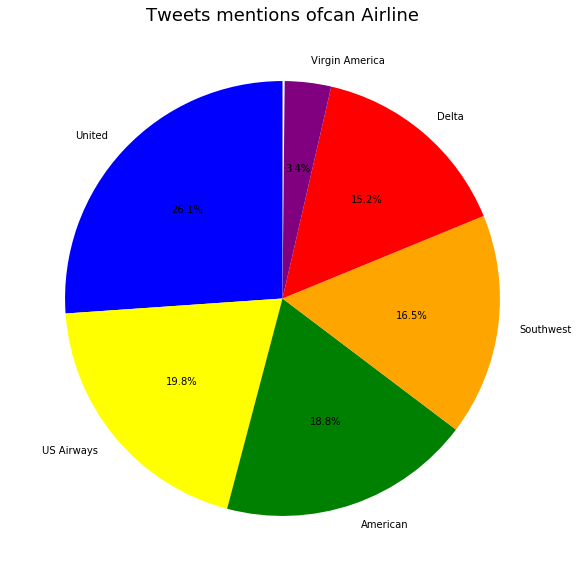

In [65]:
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [0.261, 0.198, 0.188, 0.165, 0.152, 0.0344]

colors = ['blue','yellow','green','orange', 'red', 'purple']
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Tweets mentions ofcan Airline', fontsize=18)

In [66]:
label = ['positive','negative','neutral']
final_df['sentiment'].value_counts()


neutral     5528
positive    5459
negative    3653
Name: sentiment, dtype: int64

Text(0, 0.5, 'Mood')

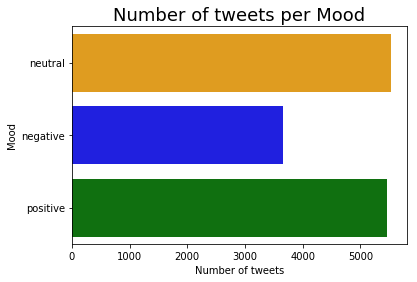

In [67]:
sns.countplot(y='sentiment', data=final_df, palette=['orange','blue','green'])
plt.title('Number of tweets per Mood', fontsize=18)
plt.xlabel('Number of tweets')
plt.ylabel('Mood')

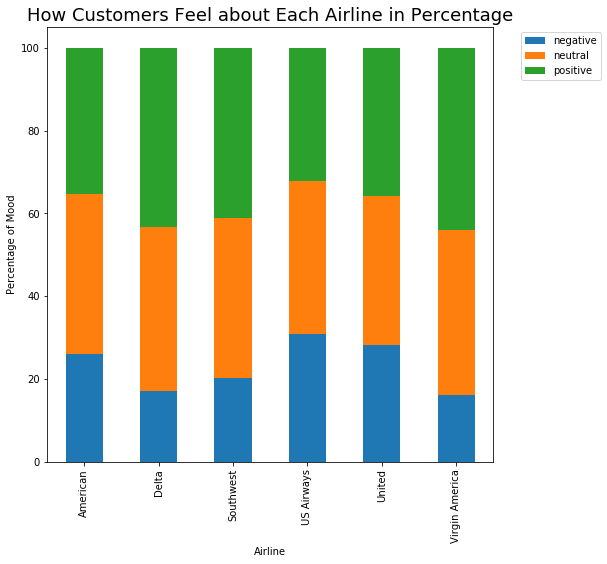

In [41]:
_ = pd.crosstab(final_df.airline, final_df.sentiment).apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar',title='How Customers Feel about Each Airline in Percentage',figsize=(8,8),stacked=True)
_.title.set_size(18)
_.set_xlabel('Airline')
_.set_ylabel('Percentage of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)